### Imports
- numpy For scientific computing
- matplotlib: For visualizing data
- h5py: Pythonic interface to the HDF5 binary data format

In [22]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import h5py

In [23]:
file_path = "data/all_snapshots.hdf5"

### Helper Functions to Aid in Data Analysis

In [24]:
def mean(data):
    count = 0                       # Track sample size
    summation = 0                   # Keep a running sum
    for num in data:                # Loop through data set
        summation += data[count]    # Sum the data values
        count += 1                  # Increment count
    return summation / count        # Return the mean

def median(data):
    count = len(data)            # Get the length of data
    sorted_data = sorted(data)   # Sort data

    if count % 2 == 1:                  # Check if even or odd
        mid = count // 2                # Find middle data point index
        return sorted_data[mid]         # Return median
    else:
        mid = count // 2                     # Find middle data point index
        left = float(sorted_data[mid - 1])   # Get left data point
        right = float(sorted_data[mid])      # Get right data point
        return (left + right) / 2.0          # Return median

def std(data):
    count = 0                   # Track sample size
    squared_diff = float(0.0)   # Keep running sum of diff^2 (cast to float to prevent type error)
    data_mean = mean(data)      # Get the mean
    for num in data:                                    # Loop through data set
        squared_diff += (data[count] - data_mean) ** 2  # Calculate the squared difference between point and mean
        count += 1                                      # Count points
    variance = squared_diff / count   # Calculate the variance
    return np.sqrt(variance)

### Read Data Set into Variables
- Condensed version of original data set contains 10, 1024 x 1024 images along with their respective tau values.

In [25]:
# Explicitly open the hdf5 file as read only
h5f = h5py.File(file_path, "r")

# Print the key values for reference
keys = h5f.keys()
print(f"Keys: {keys}\n")

# List to hold images and tau values
images = h5f["ksz_maps"]
tau_values = h5f["tau_values"][:].tolist()
print(f"Images List Shape: {images.shape}")
print(f"Tau Values List:   {tau_values[:]}")

# Explicitly close hdf5 file
# h5f.close()

Keys: <KeysViewHDF5 ['ksz_maps', 'tau_values']>

Images List Shape: (1000, 1024, 1024)
Tau Values List:   [0.04934259014229634, 0.06491457314571873, 0.05260325395518275, 0.05625422805928001, 0.06860118745208645, 0.05420070520958668, 0.05896275116315667, 0.05879498791108795, 0.055460806198125545, 0.06162772510729051, 0.05340986965546083, 0.05259148958453117, 0.0651937412351558, 0.054593186206621944, 0.06524408723749814, 0.05167312954319047, 0.06397263253333395, 0.06284003035727298, 0.05674391936937471, 0.05640011651821897, 0.04979825769310014, 0.05119149912082457, 0.06590259600415219, 0.049286681517947246, 0.05287457057595455, 0.06069101018348866, 0.050719688612806284, 0.05027888341423209, 0.0665977145163278, 0.06851604131823931, 0.06197730658121347, 0.04857896088011588, 0.05795947826434773, 0.05285233666579192, 0.06550718057979946, 0.052069284379588, 0.04871959634373455, 0.05881326560554187, 0.057772353284259295, 0.06596819597909354, 0.06722516813607186, 0.05167070670243508, 0.06234034

### Analyze the Tau Values
- Calculate the mean, median and standard deviation of the tau values.

In [26]:
tau_mean = mean(tau_values)
tau_median = median(tau_values)
tau_std = std(tau_values)
print(f"Tau Mean:   {tau_mean}")
print(f"Tau Median: {tau_median}")
print(f"Tau STD:    {tau_std}")


Tau Mean:   0.0583843055940461
Tau Median: 0.058379890746056914
Tau STD:    0.005831276197427951


### Analyze the Heat Maps

In [27]:
pixel_min = []
pixel_max = []
pixel_std = []
pixel_mean = []
# Loop through images and calculate basic statistics
for image in images:
    # Calculate minimum pixel intensity
    pixel_min.append(np.min(image))
    # Calculate maximum pixel intensity
    pixel_max.append(np.max(image))
    # Calculate standard deviation of pixel intensities
    pixel_std.append(np.std(image))
    # Calculate mean of pixel intensities
    pixel_mean.append(np.mean(image))


### Plot Mean Pixel Intensity vs Tau

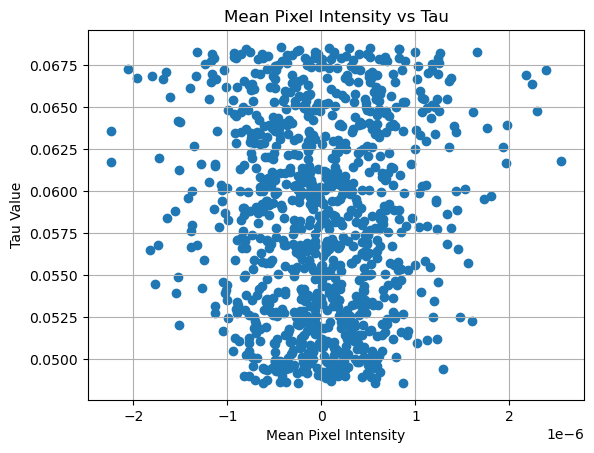

In [28]:
plt.scatter(pixel_mean, tau_values)
plt.xlabel("Mean Pixel Intensity")
plt.ylabel("Tau Value")
plt.title("Mean Pixel Intensity vs Tau")
plt.grid(True)
plt.show()